In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import scipy as sp
import spacy
from spacy import displacy
import networkx as nx

import os
import re

In [2]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 27.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\mario\Documents\Data_Science_Projects\stormlight_characters_network\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
nlp = spacy.load("en_core_web_sm")

# Load Books

In [3]:
books = [b for b in os.scandir('books') if '.txt' in b.name]

In [4]:
book = books[2]

In [5]:
book_text = open(book, encoding="utf-8").read()

In [7]:
nlp.max_length = 3500000
book_doc = nlp(book_text)

In [8]:
# Visualize identified entities
displacy.render(book_doc[0:1000], style="ent", jupyter=True)

# Load character names

In [14]:
character_df = pd.read_csv('./characters/characters.csv')

In [15]:
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [17]:
pd.set_option('display.max_rows', None)
character_df

ethnicity                    character       character_firstname
0           Aimians                Arclomedarian             Arclomedarian
1           Aimians                        Axies                     Axies
2           Aimians                  Yelamaiszin               Yelamaiszin
3            Alethi                         Abry                      Abry
4            Alethi                         Acis                      Acis
5            Alethi                Adolin Kholin                    Adolin
6            Alethi               Aesudan Kholin                   Aesudan
7            Alethi                         Agil                      Agil
8            Alethi                       Alabet                    Alabet
9            Alethi                       Aladar                    Aladar
10           Alethi                      Alaward                   Alaward
11           Alethi                         Alds                      Alds
12           Alethi                        Alili                     Alili
13           Alethi                       Arafik                    Arafik
14           Alethi                  Aratin Khal                    Aratin
15           Alethi                      Ashelem                   Ashelem
16           Alethi                 Avarak Matal                    Avarak
17           Alethi                       Avaran                    Avaran
18           Alethi                       Bashin                    Bashin
19           Alethi                        Beard                     Beard
20           Alethi                         Beld                      Beld
21           Alethi                        Beryl                     Beryl
22           Alethi                       Bethab                    Bethab
23           Alethi                       Bordin                    Bordin
24           Alethi         Brightlord Morakotha                Brightlord
25           Alethi                        Caull                     Caull
26           Alethi                         Cenn                      Cenn
27           Alethi                      Chanada                   Chanada
28           Alethi                        Colot                     Colot
29           Alethi                       Dabbid                    Dabbid
30           Alethi                        Dalar                     Dalar
31           Alethi               Dalinar Kholin                   Dalinar
32           Alethi             Dalinar's father                 Dalinar's
33           Alethi                       Dallet                    Dallet
34           Alethi             Danlan Morakotha                    Danlan
35           Alethi                     Deedanor                  Deedanor
36           Alethi                          Dod                       Dod
37           Alethi                          Dok                       Dok
38           Alethi                          Dru                       Dru
39           Alethi                        Dunny                     Dunny
40           Alethi               Elhokar Kholin                   Elhokar
41           Alethi                  Elit Ruthar                      Elit
42           Alethi                     Elthebar                  Elthebar
43           Alethi                       Eshava                    Eshava
44           Alethi                      Falilar                   Falilar
45           Alethi                        Febin                     Febin
46           Alethi                          Fin                       Fin
47           Alethi                        Galan                     Galan
48           Alethi                       Gallam                    Gallam
49           Alethi               Gavilar Kholin                   Gavilar
50           Alethi                 General Khal                   General
51           Alethi                       Graves                    Graves
52           Alethi                

# Get named entity list per sentence

In [9]:
sent_entity_list = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_list.append({"sentence": sent, "entities": entity_list})

sent_entity_df = pd.DataFrame(sent_entity_list)

In [10]:
sent_entity_df

sentence entities
0      (THE, WAY, OF, KINGS, \n\n\n, PRELUDE, TO, \n\...  [Kalak]
1      (The, enormous, stone, beast, lay, on, its, si...       []
2      (The, monstrosity, was, vaguely, skeletal, in,...       []
3      (The, eyes, were, deep, red, spots, on, the, a...       []
4                                 (They, faded, ., \n\n)       []
...                                                  ...      ...
38982                                   (Originality, .)       []
38983                                       (Novelty, .)       []
38984   (But, most, \n, importantly, ..., timeliness, .)       []
38985  (I, fear, you, may, be, too, late, ,, my, conf...       []
38986  (THE, END, OF, \n\n\n, Book, One, of, \n\n, TH...    [One]

[38987 rows x 2 columns]

In [11]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.character)
            or ent in list(character_df.character_firstname)]

In [16]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(15)

sentence  \
174  (Szeth, did, not, sway, to, the, drums, ,, dri...   
178  (Most, out, here, in, the, East, thought, \n, ...   
180  (The, drummers, began, a, new, rhythm, The, be...   
181  (Szeth, ’s, masters, —, who, were, \n, dismiss...   
192  (Szeth, stood, and, began, to, pick, his, way,...   
195  (As, he, walked, ,, Szeth, was, \n, forced, to...   
197  (Where, was, Jasnah, ,, the, king, ’s, daughte...   
198  (Elhokar, ,, the, king, ’s, son, and, \n, heir...   
201  (Szeth, stayed, far, from, the, heir, ,, \n, s...   
203  (As, Szeth, passed, \n, the, drummers, ,, they...   
209    (But, Szeth, did, not, ask, questions, ., \n\n)   
215  (Szeth, hoped, that, was, just, \n, wishful, b...   
230   (Szeth, left, the, feasting, chamber, behind, .)   
233  (A, man, \n, with, a, long, grey, and, black, ...   
238  (Szeth, brushed, by, ,, \n, continuing, past, ...   

                    entities       character_entities  
174                  [Szeth]                  [Szeth]  
178            [East, Szeth]                  [Szeth]  
180                  [Szeth]                  [Szeth]  
181                  [Szeth]                  [Szeth]  
192                  [Szeth]                  [Szeth]  
195  [Szeth, Dalinar Kholin]  [Szeth, Dalinar Kholin]  
197                 [Jasnah]                 [Jasnah]  
198                [Elhokar]                [Elhokar]  
201                  [Szeth]                  [Szeth]  
203                  [Szeth]                  [Szeth]  
209                  [Szeth]                  [Szeth]  
215                  [Szeth]                  [Szeth]  
230                  [Szeth]                  [Szeth]  
233                  [Szeth]                  [Szeth]  
238             [Szeth, Ten]             [Szeth, Ten]

In [17]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])

C:\Users\mario\AppData\Local\Temp\ipykernel_21148\1150129198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] for item in x])


In [18]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence       entities  \
174    (Szeth, did, not, sway, to, the, drums, ,, dri...        [Szeth]   
178    (Most, out, here, in, the, East, thought, \n, ...  [East, Szeth]   
180    (The, drummers, began, a, new, rhythm, The, be...        [Szeth]   
181    (Szeth, ’s, masters, —, who, were, \n, dismiss...        [Szeth]   
192    (Szeth, stood, and, began, to, pick, his, way,...        [Szeth]   
...                                                  ...            ...   
38789  (He, turned, to, Dalinar, ,, meeting, his, eye...      [Dalinar]   
38791  (“, I, can, not, comprehend, how, that, can, b...      [Dalinar]   
38793  (“, Men, must, face, them, together, ,, ”, the...      [Dalinar]   
38835                              (“, Brightlord, ?, ”)   [Brightlord]   
38841                              (“, Brightlord, ?, ”)   [Brightlord]   

      character_entities  
174              [Szeth]  
178              [Szeth]  
180              [Szeth]  
181              [Szeth]  
192              [Szeth]  
...                  ...  
38789          [Dalinar]  
38791          [Dalinar]  
38793          [Dalinar]  
38835       [Brightlord]  
38841       [Brightlord]  

[7940 rows x 3 columns]

# Create relationships

In [19]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])

    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list))
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx+1]
            relationships.append({"source": a, "target": b})

In [20]:
relationships_df = pd.DataFrame(relationships)

In [21]:
pd.set_option('display.max_rows', None)
relationships_df

source       target
0            Szeth      Dalinar
1            Szeth      Dalinar
2            Szeth      Dalinar
3          Dalinar       Jasnah
4            Szeth      Dalinar
5          Dalinar       Jasnah
6           Jasnah      Elhokar
7            Szeth      Dalinar
8          Dalinar       Jasnah
9           Jasnah      Elhokar
10           Szeth      Dalinar
11         Dalinar       Jasnah
12          Jasnah      Elhokar
13          Jasnah      Elhokar
14         Elhokar        Szeth
15          Jasnah      Elhokar
16         Elhokar        Szeth
17         Elhokar        Szeth
18           Szeth          Ten
19           Szeth          Ten
20           Szeth          Ten
21           Szeth          Ten
22           Szeth          Ten
23           Szeth          Ten
24           Szeth    Truthless
25           Szeth    Truthless
26           Szeth    Truthless
27           Szeth    Truthless
28           Szeth    Truthless
29           Szeth    Truthless
30           Szeth      Gavilar
31           Szeth      Gavilar
32           Szeth          Ten
33           Szeth          Ten
34           Szeth          Ten
35           Szeth          Ten
36           Szeth          Ten
37            Cenn       Dallet
38            Cenn       Dallet
39            Cenn       Dallet
40            Cenn       Dallet
41            Cenn       Dallet
42            Cenn      Kaladin
43            Cenn      Kaladin
44         Kaladin         Cenn
45            Cenn      Kaladin
46         Kaladin         Cenn
47            Cenn      Kaladin
48         Kaladin         Cenn
49            Cenn      Kaladin
50         Kaladin         Cenn
51            Cenn      Kaladin
52         Kaladin         Cenn
53          Dallet         Cenn
54          Dallet         Cenn
55          Dallet         Cenn
56          Dallet         Cenn
57          Dallet         Cenn
58          Dallet         Cenn
59            Cenn      Kaladin
60            Cenn      Kaladin
61            Cenn      Kaladin
62            Cenn      Kaladin
63         Kaladin         Cenn
64            Cenn      Kaladin
65            Cenn      Kaladin
66            Cenn      Kaladin
67            Cenn      Kaladin
68         Kaladin         Cenn
69         Kaladin         Cenn
70            Cenn       Dallet
71         Kaladin         Cenn
72            Cenn       Dallet
73            Cenn       Dallet
74          Dallet      Kaladin
75            Cenn       Dallet
76          Dallet      Kaladin
77            Cenn       Dallet
78          Dallet      Kaladin
79          Dallet      Kaladin
80         Kaladin         Cenn
81            Cenn      Kaladin
82            Cenn      Kaladin
83            Cenn      Kaladin
84         Kaladin         Cenn
85         Kaladin         Cenn
86         Kaladin         Cenn
87         Kaladin         Cenn
88         Kaladin         Cenn
89         Kaladin         Cenn
90            Cenn       Dallet
91          Dallet      Kaladin
92          Dallet      Kaladin
93          Dallet      Kaladin
94         Kaladin       Dallet
95          Dallet      Kaladin
96         Kaladin       Dallet
97          Dallet      Kaladin
98         Kaladin       Dallet
99          Dallet      Kaladin
100        Kaladin       Dallet
101         Dallet         Cenn
102           Cenn      Kaladin
103           Cenn      Kaladin
104        Kaladin         Cenn
105           Cenn      Kaladin
106        Kaladin         Cenn
107           Cenn      Kaladin
108        Kaladin         Cenn
109           Cenn       Dallet
110           Cenn      Kaladin
111        Kaladin         Cenn
112           Cenn       Dallet
113        Kaladin         Cenn
114           Cenn       Dallet
115           Cenn       Dallet
116         Dallet         Cenn
117         Dallet         Cenn
118         Dallet         Cenn
119           Cenn      Kaladin
120           Cenn      Kaladin
121        Kaladin         Cenn
122        Kaladin         Cenn
123           Cenn       Dallet
124        K

In [22]:
# Sort the cases with a->b and b->a
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)
relationships_df

source       target
0         Dalinar        Szeth
1         Dalinar        Szeth
2         Dalinar        Szeth
3         Dalinar       Jasnah
4         Dalinar        Szeth
5         Dalinar       Jasnah
6         Elhokar       Jasnah
7         Dalinar        Szeth
8         Dalinar       Jasnah
9         Elhokar       Jasnah
10        Dalinar        Szeth
11        Dalinar       Jasnah
12        Elhokar       Jasnah
13        Elhokar       Jasnah
14        Elhokar        Szeth
15        Elhokar       Jasnah
16        Elhokar        Szeth
17        Elhokar        Szeth
18          Szeth          Ten
19          Szeth          Ten
20          Szeth          Ten
21          Szeth          Ten
22          Szeth          Ten
23          Szeth          Ten
24          Szeth    Truthless
25          Szeth    Truthless
26          Szeth    Truthless
27          Szeth    Truthless
28          Szeth    Truthless
29          Szeth    Truthless
30        Gavilar        Szeth
31        Gavilar        Szeth
32          Szeth          Ten
33          Szeth          Ten
34          Szeth          Ten
35          Szeth          Ten
36          Szeth          Ten
37           Cenn       Dallet
38           Cenn       Dallet
39           Cenn       Dallet
40           Cenn       Dallet
41           Cenn       Dallet
42           Cenn      Kaladin
43           Cenn      Kaladin
44           Cenn      Kaladin
45           Cenn      Kaladin
46           Cenn      Kaladin
47           Cenn      Kaladin
48           Cenn      Kaladin
49           Cenn      Kaladin
50           Cenn      Kaladin
51           Cenn      Kaladin
52           Cenn      Kaladin
53           Cenn       Dallet
54           Cenn       Dallet
55           Cenn       Dallet
56           Cenn       Dallet
57           Cenn       Dallet
58           Cenn       Dallet
59           Cenn      Kaladin
60           Cenn      Kaladin
61           Cenn      Kaladin
62           Cenn      Kaladin
63           Cenn      Kaladin
64           Cenn      Kaladin
65           Cenn      Kaladin
66           Cenn      Kaladin
67           Cenn      Kaladin
68           Cenn      Kaladin
69           Cenn      Kaladin
70           Cenn       Dallet
71           Cenn      Kaladin
72           Cenn       Dallet
73           Cenn       Dallet
74         Dallet      Kaladin
75           Cenn       Dallet
76         Dallet      Kaladin
77           Cenn       Dallet
78         Dallet      Kaladin
79         Dallet      Kaladin
80           Cenn      Kaladin
81           Cenn      Kaladin
82           Cenn      Kaladin
83           Cenn      Kaladin
84           Cenn      Kaladin
85           Cenn      Kaladin
86           Cenn      Kaladin
87           Cenn      Kaladin
88           Cenn      Kaladin
89           Cenn      Kaladin
90           Cenn       Dallet
91         Dallet      Kaladin
92         Dallet      Kaladin
93         Dallet      Kaladin
94         Dallet      Kaladin
95         Dallet      Kaladin
96         Dallet      Kaladin
97         Dallet      Kaladin
98         Dallet      Kaladin
99         Dallet      Kaladin
100        Dallet      Kaladin
101          Cenn       Dallet
102          Cenn      Kaladin
103          Cenn      Kaladin
104          Cenn      Kaladin
105          Cenn      Kaladin
106          Cenn      Kaladin
107          Cenn      Kaladin
108          Cenn      Kaladin
109          Cenn       Dallet
110          Cenn      Kaladin
111          Cenn      Kaladin
112          Cenn       Dallet
113          Cenn      Kaladin
114          Cenn       Dallet
115          Cenn       Dallet
116          Cenn       Dallet
117          Cenn       Dallet
118          Cenn       Dallet
119          Cenn      Kaladin
120          Cenn      Kaladin
121          Cenn      Kaladin
122          Cenn      Kaladin
123          Cenn       Dallet
124          Cenn      Kaladin
125          Cenn       Dallet
126          Cenn       Dallet
127          Cenn       Dallet
128         

In [23]:
relationships_df["value"] = 1
relationships_df = relationships_df.groupby(["source", "target"], sort=False, as_index=False).sum()

In [26]:
relationships_df.head(20)

source     target  value
0      Dalinar      Szeth      6
1      Dalinar     Jasnah     76
2      Elhokar     Jasnah     43
3      Elhokar      Szeth      3
4        Szeth        Ten     21
5        Szeth  Truthless      6
6      Gavilar      Szeth     15
7         Cenn     Dallet    133
8         Cenn    Kaladin    392
9       Dallet    Kaladin    223
10  Brightlord       Cenn     10
11        Cenn     Kusiri      6
12      Dallet     Kusiri      5
13      Dallet     Hallaw      5
14        Cenn        Ten      5
15     Kaladin        Ten     33
16     Kaladin  Unclaimed      6
17     Kaladin     Tvlakv    263
18      Tvlakv  Unclaimed      4
19     Kaladin       Tien    428

# Graph analysis and visualization

In [27]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationships_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization

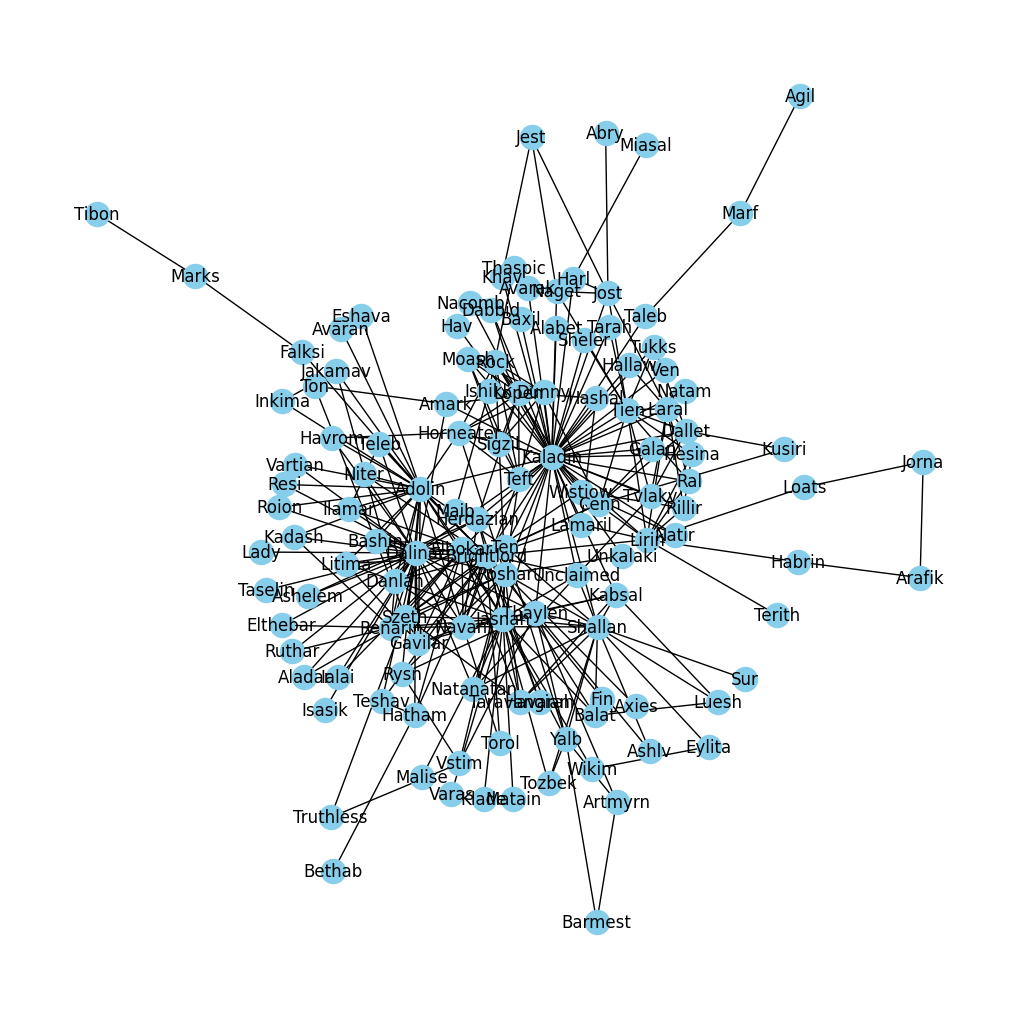

In [31]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [39]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("stormlight.html")

stormlight.html


# The most popular characters

In [40]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Dalinar': 0.28455284552845533,
 'Szeth': 0.0813008130081301,
 'Jasnah': 0.21951219512195125,
 'Elhokar': 0.11382113821138212,
 'Ten': 0.07317073170731708,
 'Truthless': 0.016260162601626018,
 'Gavilar': 0.06504065040650407,
 'Cenn': 0.06504065040650407,
 'Dallet': 0.05691056910569106,
 'Kaladin': 0.42276422764227645,
 'Brightlord': 0.1869918699186992,
 'Kusiri': 0.016260162601626018,
 'Hallaw': 0.016260162601626018,
 'Unclaimed': 0.04878048780487805,
 'Tvlakv': 0.04065040650406505,
 'Tien': 0.10569105691056911,
 'Tukks': 0.024390243902439025,
 'Thaylen': 0.0813008130081301,
 'Shallan': 0.13821138211382114,
 'Tozbek': 0.024390243902439025,
 'Ashlv': 0.016260162601626018,
 'Yalb': 0.05691056910569106,
 'Roshar': 0.14634146341463417,
 'Taravangian': 0.04878048780487805,
 'Malise': 0.008130081300813009,
 'Laral': 0.05691056910569106,
 'Kabsal': 0.04878048780487805,
 'Herdazian': 0.05691056910569106,
 'Artmyrn': 0.024390243902439025,
 'Natanatan': 0.04065040650406505,
 'Barmest': 0.016260

<Axes: >

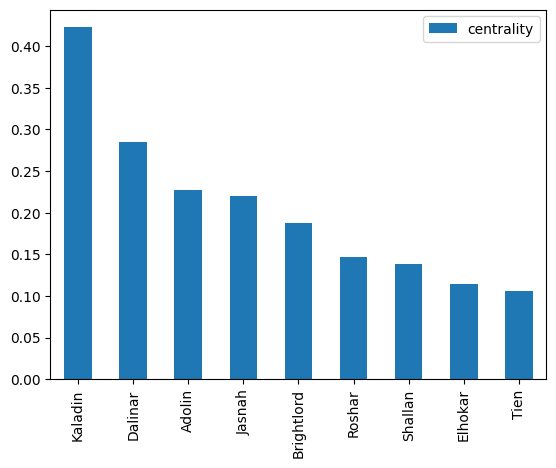

In [41]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

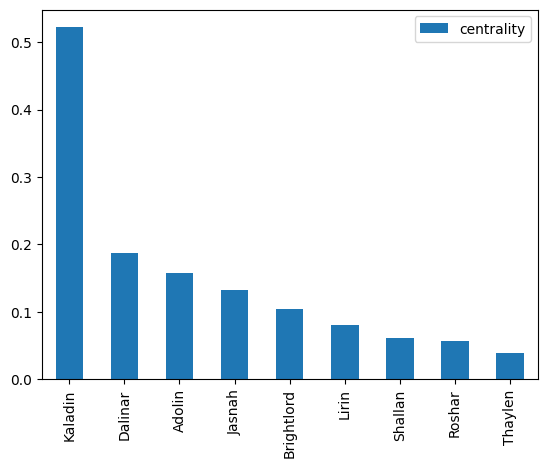

In [42]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

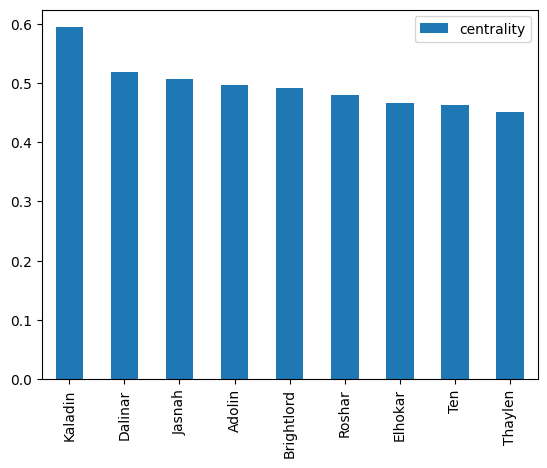

In [43]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [44]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

# Community detection

In [57]:
import community.community_louvain as community_louvain

In [58]:
communities = community_louvain.best_partition(G)

In [59]:
communities

{'Dalinar': 0,
 'Szeth': 6,
 'Jasnah': 6,
 'Elhokar': 0,
 'Ten': 6,
 'Truthless': 6,
 'Gavilar': 0,
 'Cenn': 7,
 'Dallet': 7,
 'Kaladin': 7,
 'Brightlord': 0,
 'Kusiri': 7,
 'Hallaw': 7,
 'Unclaimed': 6,
 'Tvlakv': 7,
 'Tien': 7,
 'Tukks': 7,
 'Thaylen': 6,
 'Shallan': 6,
 'Tozbek': 6,
 'Ashlv': 6,
 'Yalb': 6,
 'Roshar': 6,
 'Taravangian': 6,
 'Malise': 6,
 'Laral': 7,
 'Kabsal': 6,
 'Herdazian': 0,
 'Artmyrn': 6,
 'Natanatan': 6,
 'Barmest': 6,
 'Lirin': 7,
 'Hesina': 7,
 'Wistiow': 7,
 'Teft': 5,
 'Ishikk': 1,
 'Thaspic': 1,
 'Maib': 1,
 'Eylita': 6,
 'Balat': 6,
 'Ton': 6,
 'Amark': 6,
 'Adolin': 0,
 'Renarin': 0,
 'Vartian': 0,
 'Bashin': 0,
 'Navani': 0,
 'Moash': 5,
 'Dunny': 5,
 'Sigzil': 5,
 'Unkalaki': 7,
 'Horneater': 5,
 'Rock': 5,
 'Roion': 0,
 'Ral': 7,
 'Jest': 7,
 'Jost': 7,
 'Naget': 7,
 'Khav': 7,
 'Dabbid': 5,
 'Avaran': 0,
 'Marks': 3,
 'Tibon': 3,
 'Falksi': 3,
 'Teshav': 0,
 'Hatham': 0,
 'Kadash': 0,
 'Ruthar': 0,
 'Elthebar': 0,
 'Aladar': 0,
 'Harl': 7,
 'Miasal

In [60]:
nx.set_node_attributes(G, communities, 'group')

In [61]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("stormlight_communities.html")

stormlight_communities.html
